# Linear systems

## Import the libraries

In [ ]:
pip install -q retratodefases

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from retratodefases import *
import numpy as np
import sympy as sp

np.set_printoptions(precision=6, suppress=True)

## Calculating eigenvalues and eigenvectors

In [ ]:
# Define your square matrix. Replace this with your matrix.
matrix = np.array([[1, -2, 0], [1, 5, 0],[0,0,3]])

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix)

# Print the matrix, eigenvalues and eigenvectors
print(f" Matrix: \n {matrix} \n Eigenvalues: \n {eigenvalues}\n Eigenvectors: {eigenvectors}")

 Matrix: 
 [[ 1 -2  0]
 [ 1  5  0]
 [ 0  0  3]] 
 Eigenvalues: 
 [1.585786 4.414214 3.      ]
 Eigenvectors: [[-0.959683  0.505449  0.      ]
 [ 0.281085 -0.862856  0.      ]
 [ 0.        0.        1.      ]]


## Calculating and ploting real eigenvectors for 2 by 2 matrix

In [ ]:
a = 0.2489798273498
round(a,6)

0.24898

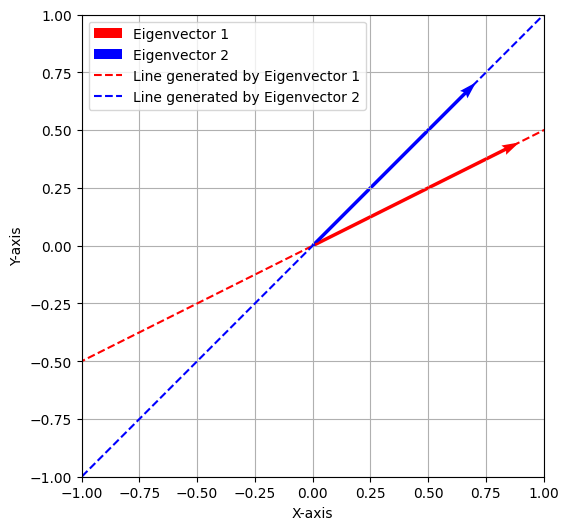

In [ ]:
# Define your square matrix. Replace this with your matrix.
matrix = np.array([[4, -2], [1, 1]])

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix)

# Extract the eigenvectors
eigenvector1 = eigenvectors[:, 0]
eigenvector2 = eigenvectors[:, 1]

# Create a 2D plot
plt.figure(figsize=(6, 6))

# Plot the eigenvectors as arrows
plt.quiver(0, 0, eigenvector1[0], eigenvector1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Eigenvector 1')
plt.quiver(0, 0, eigenvector2[0], eigenvector2[1], angles='xy', scale_units='xy', scale=1, color='b', label='Eigenvector 2')

# Plot the lines generated by the eigenvectors (dashed lines)
x = np.linspace(-2, 2, 100)
plt.plot(x, eigenvector1[1] / eigenvector1[0] * x, '--', color='r', label='Line generated by Eigenvector 1')
plt.plot(x, eigenvector2[1] / eigenvector2[0] * x, '--', color='b', label='Line generated by Eigenvector 2')

# Set axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set axis labels
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.grid()
plt.show()

In [ ]:
def dFvectorfield(x, y):
    return -3*x+5*y, -2*x+2*y

Now that we have the function that defines our system, we can create an object of the 2DPhasePortrait class by initializing it with our system function, dFOscillator.

The 2DPhasePortrait class has 2 required parameters:

The derivative function, dF
The range of the representation, which can be indicated in three ways:
To represent over a 'square' domain, we pass only the argument [lowerlimit, upperlimit]. This way both axes will have the same range.

If we want them to have a different range, we must pass the argument as follows: [[limiteInferiorEjeX, limiteSuperiorEjeX], [limiteInferiorEjeY, limiteSuperiorEjeY]]

If we want to represent from 0 to a certain number, we will only need to enter that number (it is also valid if it is negative). Obviously, we can't just put zero.

Now, let's create the object, and plot the plot, using the plot() class method:

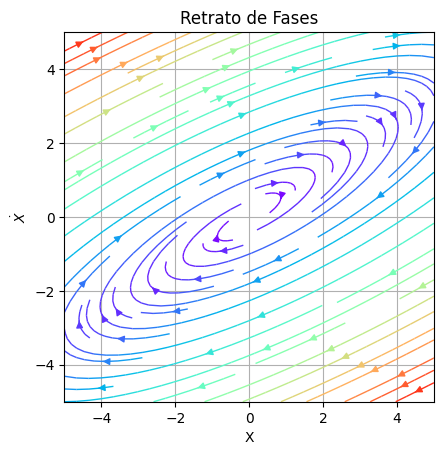

In [ ]:
Retratovectorfield = RetratoDeFases2D(dFvectorfield, [-5,5])
Retratovectorfield.plot()

In [ ]:
# Define your square matrix. Replace this with your matrix.
matrix = np.array([[4, -2], [1, 1]])

# Convert the matrix to a SymPy matrix
sym_matrix = sp.Matrix(matrix)

# Compute the Jordan normal form
P, J = sym_matrix.jordan_form()#this way only works for real eigenvalues

# Convert the result back to a NumPy array for numerical computations
Jordan_form = np.array(J, dtype=float)

print("Jordan Normal Form:")
print(Jordan_form)

Jordan Normal Form:
[[2. 0.]
 [0. 3.]]


In [ ]:
# Define your square matrix with complex eigenvalues. Replace this with your matrix.
matrix = np.array([[3, 5], [-2, -2]])

# Convert the matrix to a SymPy matrix
sym_matrix = sp.Matrix(matrix)

# Compute the Jordan normal form
P, J = sym_matrix.jordan_form(chop=True)#this way works for real and complex eigenvalues

# Convert the result back to a NumPy array for numerical computations
Jordan_form = np.array(J, dtype=complex)

print("Jordan Normal Form:")
print(Jordan_form)

Jordan Normal Form:
[[0.5-1.936492j 0. +0.j      ]
 [0. +0.j       0.5+1.936492j]]


## **Exercises from Smale book.**

### **Chapter 2**


#### **Exercise 2**

Find the general solution of each of the following linear systems:

In [ ]:
def general_solution(A, variable="X"):

    eigenvalues, eigenvectors = np.linalg.eig(A)
    if eigenvectors[0][0] != 0:
      eigenvectors = eigenvectors / eigenvectors[0][0]

    real = {}
    comple = {}
    equal = {}

    for i in range(len(eigenvalues)):
        if np.imag(eigenvalues[i]) != 0:
            comple[i] = np.round(eigenvalues[i],6)
        elif np.round(eigenvalues[i],6) not in list(real.values()):
            real[i] = np.real(np.round(eigenvalues[i],6))
        else:
            equal[i] = np.real(np.round(eigenvalues[i],6))

    solution = f"{variable.lower()}(t) = \n"

    for index, value in real.items():
        solution += f"+ C_{index} * e^({value} * t) * {np.real(eigenvectors[:, index])}^T \n"

    repeated_count = {}

    for index, value in equal.items():
        if value not in repeated_count.keys():
            solution += f"+ C_{index} * e^({value} * t) * (t) * {eigenvectors[:, index]}^T \n"
            repeated_count[value] = 2
        else:
            solution += f"+ C_{index} * e^({value} * t) * (t^{repeated_count[value]}/{repeated_count[value]}!) * {eigenvectors[:, index]}^T \n"
            repeated_count[value] += 1

    complex_count = {}
    for index, value in comple.items():
        real_value = np.real(value)
        imag_value = np.imag(value)
        if real_value not in complex_count.keys() and imag_value not in complex_count.get(real_value, []):
            solution += f"+ C_{index} * e^({real_value} * t) * [cos({abs(imag_value)} * t)\t-sin({abs(imag_value)} * t)]^T \n"
            complex_count[real_value] = [imag_value]
        if real_value in complex_count.keys() and imag_value not in complex_count.get(real_value, []):
            solution += f"+ C_{index} * e^({real_value} * t) * [sin({abs(imag_value)} * t)\tcos({abs(imag_value)} * t)]^T \n"
            complex_count[real_value].append(imag_value)

    print(f"{variable}' = \n {A} {variable}\n",
          f"Eigenvalues:\n{eigenvalues}\n",
          f"Eigenvectors:\n{eigenvectors}\n",
          f"General Solution: {solution} Where t is the variable and T is the transposed matrix.")

##### **a)**

$$
X' =
\begin{pmatrix}
1 & 2 \\
0 & 3 \\
\end{pmatrix}
X
$$

In [ ]:
matrix = np.array([[1, 2], [0, 3]])
general_solution(matrix)

X' = 
 [[1 2]
 [0 3]] X
 Eigenvalues:
[1. 3.]
 Eigenvectors:
[[1.       0.707107]
 [0.       0.707107]]
 General Solution: x(t) = 
+ C_0 * e^(1.0 * t) * [1. 0.]^T 
+ C_1 * e^(3.0 * t) * [0.707107 0.707107]^T 
 Where t is the variable and T is the transposed matrix.


##### **b)**

$$
X' =
\begin{pmatrix}
1 & 2 \\
3 & 6 \\
\end{pmatrix}
X
$$

In [ ]:
matrix = np.array([[1, 2], [3, 6]])
general_solution(matrix)

X' = 
 [[1 2]
 [3 6]] X
 Eigenvalues:
[0. 7.]
 Eigenvectors:
[[ 1.        0.353553]
 [-0.5       1.06066 ]]
 General Solution: x(t) = 
+ C_0 * e^(0.0 * t) * [ 1.  -0.5]^T 
+ C_1 * e^(7.0 * t) * [0.353553 1.06066 ]^T 
 Where t is the variable and T is the transposed matrix.


##### **c)**

$$
X' =
\begin{pmatrix}
1 & 2 \\
1 & 0 \\
\end{pmatrix}
X
$$

In [ ]:
matrix = np.array([[1, 2], [1, 0]])
general_solution(matrix)

X' = 
 [[1 2]
 [1 0]] X
 Eigenvalues:
[ 2. -1.]
 Eigenvectors:
[[ 1.       -0.790569]
 [ 0.5       0.790569]]
 General Solution: x(t) = 
+ C_0 * e^(2.0 * t) * [1.  0.5]^T 
+ C_1 * e^(-1.0 * t) * [-0.790569  0.790569]^T 
 Where t is the variable and T is the transposed matrix.


##### **d)**

$$
X' =
\begin{pmatrix}
1 & 2 \\
3 & -3 \\
\end{pmatrix}
X
$$

In [ ]:
matrix = np.array([[1, 2], [3, -3]])
general_solution(matrix)

X' = 
 [[ 1  2]
 [ 3 -3]] X
 Eigenvalues:
[ 2.162278 -4.162278]
 Eigenvectors:
[[ 1.       -0.417834]
 [ 0.581139  1.078488]]
 General Solution: x(t) = 
+ C_0 * e^(2.162278 * t) * [1.       0.581139]^T 
+ C_1 * e^(-4.162278 * t) * [-0.417834  1.078488]^T 
 Where t is the variable and T is the transposed matrix.


### **Chapter 3**


#### **Exercise 1**

Find the phase portraits for the following linear systems:

In [ ]:
def generar_retrato_de_fases(x1, y1, x2, y2, eigenvalues=False, variable = "X"):
    def dFvectorfield(x, y):
        return x1 * x + y1 * y, x2 * x + y2 * y

    if eigenvalues:
      A = np.array([[x1, y1], [x2, y2]])
      eigenvalues, eigenvectors = np.linalg.eig(A)
      print(f"{variable}' = \n {A} {variable}\n",
      f"Eigenvalues:\n{eigenvalues}\n")

    Retratovectorfield = RetratoDeFases2D(dFvectorfield, [-5, 5])
    Retratovectorfield.plot()

##### **a)**

$$
\begin{pmatrix}
3 & 5 \\
-2 & -2 \\
\end{pmatrix}
$$

X' = 
 [[ 3  5]
 [-2 -2]] X
 Eigenvalues:
[0.5+1.936492j 0.5-1.936492j]



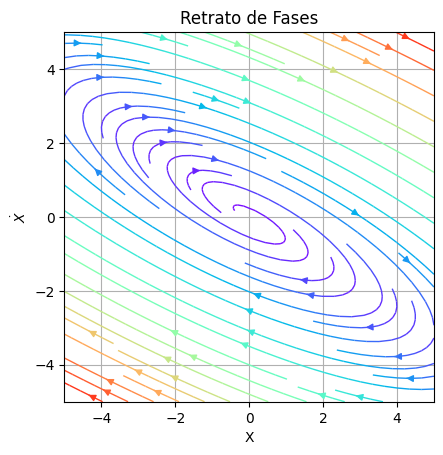

In [ ]:
generar_retrato_de_fases(3, 5, -2, -2, True)

##### **b)**

$$
\begin{pmatrix}
-3 & -2 \\
5 & 2 \\
\end{pmatrix}
$$

X' = 
 [[-3 -2]
 [ 5  2]] X
 Eigenvalues:
[-0.5+1.936492j -0.5-1.936492j]



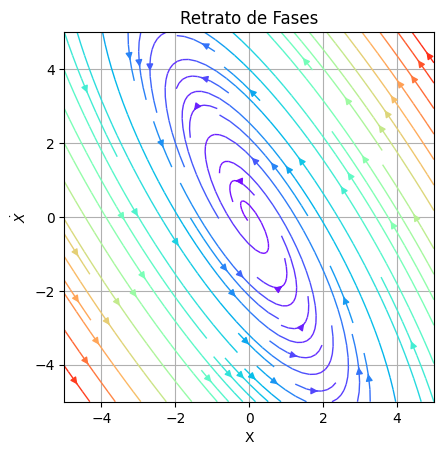

In [ ]:
generar_retrato_de_fases(-3, -2, 5, 2, True)

##### **c)**

$$
\begin{pmatrix}
3 & -2 \\
5 & -2 \\
\end{pmatrix}
$$

X' = 
 [[ 3 -2]
 [ 5 -2]] X
 Eigenvalues:
[0.5+1.936492j 0.5-1.936492j]



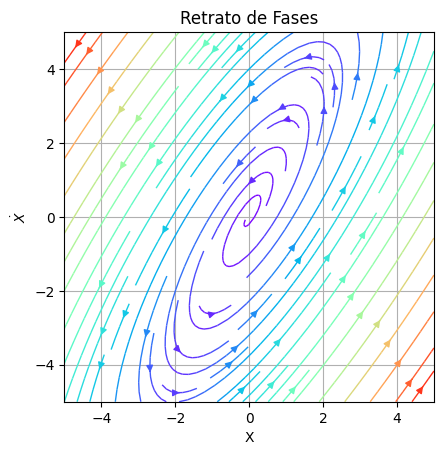

In [ ]:
generar_retrato_de_fases(3, -2, 5, -2, True)

##### **d)**

$$
\begin{pmatrix}
-3 & 5 \\
-2 & 3 \\
\end{pmatrix}
$$

X' = 
 [[-3  5]
 [-2  3]] X
 Eigenvalues:
[0.+1.j 0.-1.j]



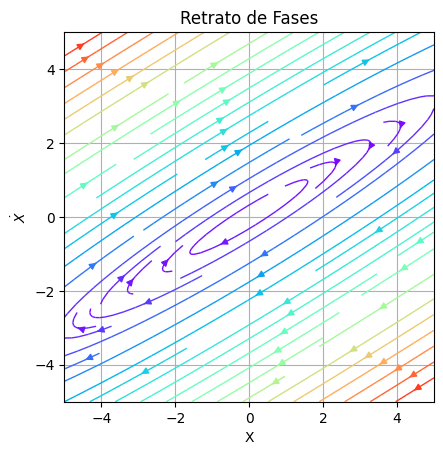

In [ ]:
generar_retrato_de_fases(-3, 5, -2, 3, True)

##### **e)**

$$
\begin{pmatrix}
-3 & 5 \\
-2 & -3 \\
\end{pmatrix}
$$

X' = 
 [[-3  5]
 [-2 -3]] X
 Eigenvalues:
[-3.+3.162278j -3.-3.162278j]



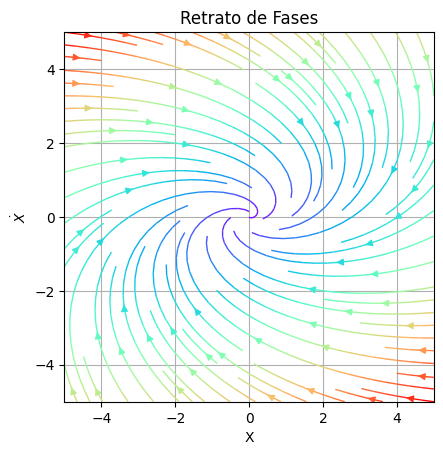

In [ ]:
generar_retrato_de_fases(-3, 5, -2, -3, True)

##### **f)**

$$
\begin{pmatrix}
-3 & 5 \\
-2 & 2 \\
\end{pmatrix}
$$

X' = 
 [[-3  5]
 [-2  2]] X
 Eigenvalues:
[-0.5+1.936492j -0.5-1.936492j]



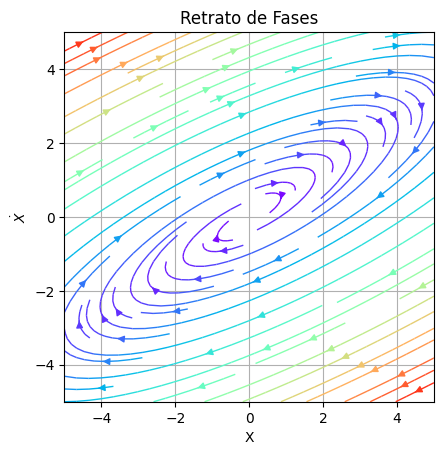

In [ ]:
generar_retrato_de_fases(-3, 5, -2, 2, True)

X' = 
 [[-4.       -0.585786]
 [ 3.414214  0.      ]] X
 Eigenvalues:
[-3.414214 -0.585786]



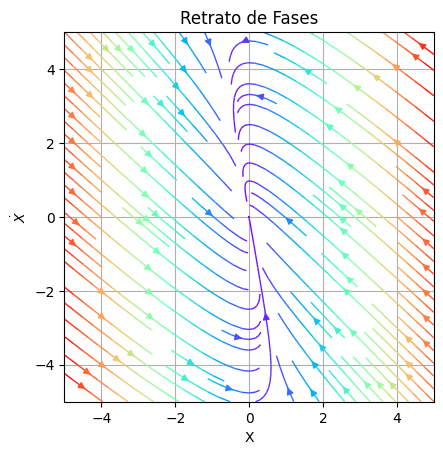

In [ ]:
a = -4
generar_retrato_de_fases(a,
                         2**0.5+(a/2),
                         2**0.5-(a/2),
                         0, True)

#### **Exercise 2**

For each of the following systems of the form $X´=AX$ do:

- Find the eigenvalues and eigenvectors of $A$.
- Find the matrix $T$ that puts $A$ in canonical form.
- Find the general solution of both $X′ = AX$ and $Y ′ = (T^{−1}AT)Y = BY$.
- Sketch the phase portraits of both systems.

In [ ]:
def transformation(x1, y1, x2, y2, retrato_fase=True):
  A = np.array([[x1, y1], [x2, y2]])
  general_solution(A)

  eigenvalues, eigenvectors = np.linalg.eig(A)
  if np.all(np.imag(eigenvalues) == 0):
    if eigenvectors[0][0] != 0:
      T = eigenvectors/eigenvectors[0][0]
    else:
      T = eigenvectors
  else:
    T = np.array([[np.real(eigenvalues[0]), np.imag(eigenvalues[0])], [np.real(eigenvalues[1]), np.imag(eigenvalues[1])]])
  print(f"\nT = \n{T}\n")
  B = np.dot(np.dot(np.linalg.inv(T), A), T)
  print(f"B = \n{B} \n")
  general_solution(B, "Y")


  if retrato_fase:
    print("\n Phase portrait for A, T, and B respectively: \n")
    generar_retrato_de_fases(x1, y1, x2, y2)
    generar_retrato_de_fases(T[0][0], T[0][1], T[1][0], T[1][1])
    generar_retrato_de_fases(B[0][0], B[0][1], B[1][0], B[1][1])

##### **i)**

$$
A =
\begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}
$$

X' = 
 [[0 1]
 [1 0]] X
 Eigenvalues:
[ 1. -1.]
 Eigenvectors:
[[ 1. -1.]
 [ 1.  1.]]
 General Solution: x(t) = 
+ C_0 * e^(1.0 * t) * [1. 1.]^T 
+ C_1 * e^(-1.0 * t) * [-1.  1.]^T 
 Where t is the variable and T is the transposed matrix.

T = 
[[ 1. -1.]
 [ 1.  1.]]

B = 
[[ 1.  0.]
 [ 0. -1.]] 

Y' = 
 [[ 1.  0.]
 [ 0. -1.]] Y
 Eigenvalues:
[ 1. -1.]
 Eigenvectors:
[[1. 0.]
 [0. 1.]]
 General Solution: y(t) = 
+ C_0 * e^(1.0 * t) * [1. 0.]^T 
+ C_1 * e^(-1.0 * t) * [0. 1.]^T 
 Where t is the variable and T is the transposed matrix.

 Phase portrait for A, T, and B respectively: 



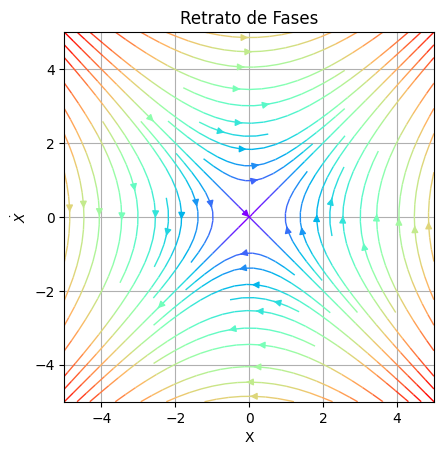

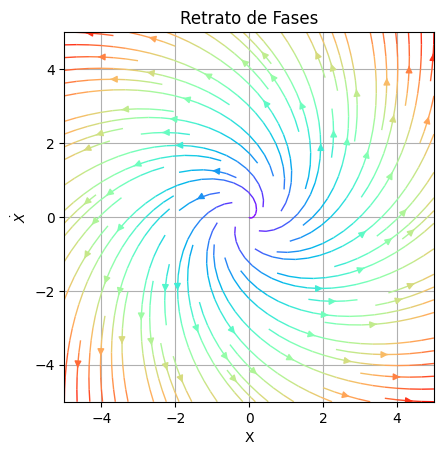

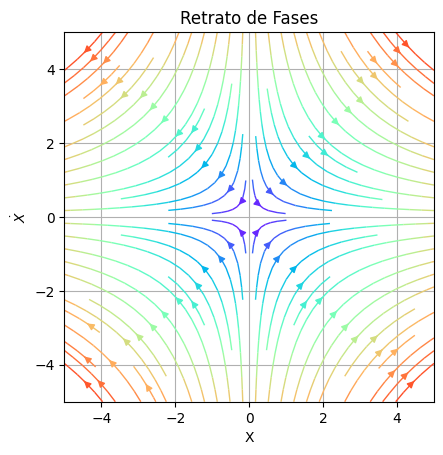

In [ ]:
transformation(0,1,1,0)

##### **ii)**

$$
A =
\begin{pmatrix}
1 & 1 \\
1 & 0 \\
\end{pmatrix}
$$

X' = 
 [[1 1]
 [1 0]] X
 Eigenvalues:
[ 1.618034 -0.618034]
 Eigenvectors:
[[ 1.       -0.618034]
 [ 0.618034  1.      ]]
 General Solution: x(t) = 
+ C_0 * e^(1.618034 * t) * [1.       0.618034]^T 
+ C_1 * e^(-0.618034 * t) * [-0.618034  1.      ]^T 
 Where t is the variable and T is the transposed matrix.

T = 
[[ 1.       -0.618034]
 [ 0.618034  1.      ]]

B = 
[[ 1.618034  0.      ]
 [ 0.       -0.618034]] 

Y' = 
 [[ 1.618034  0.      ]
 [ 0.       -0.618034]] Y
 Eigenvalues:
[ 1.618034 -0.618034]
 Eigenvectors:
[[ 1. -0.]
 [ 0.  1.]]
 General Solution: y(t) = 
+ C_0 * e^(1.618034 * t) * [1. 0.]^T 
+ C_1 * e^(-0.618034 * t) * [-0.  1.]^T 
 Where t is the variable and T is the transposed matrix.

 Phase portrait for A, T, and B respectively: 



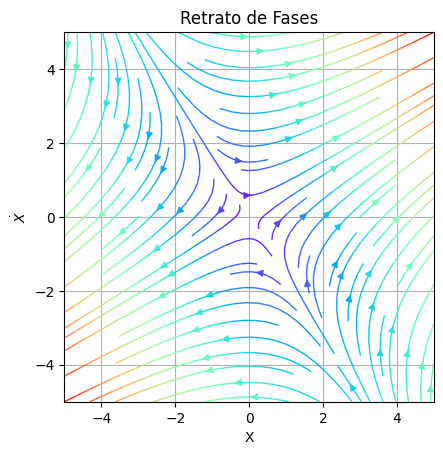

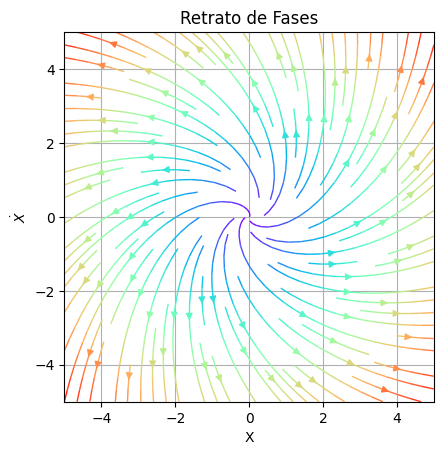

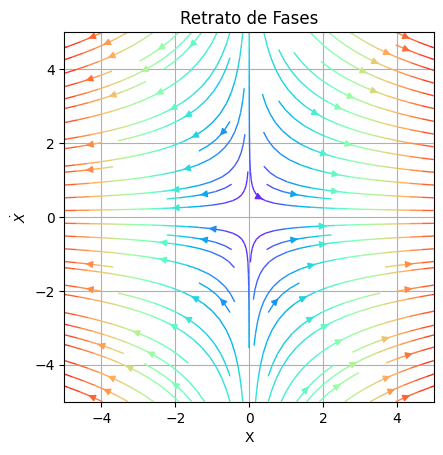

In [ ]:
transformation(1,1,1,0)

##### **iii)**

$$
A =
\begin{pmatrix}
1 & 1 \\
-1 & 0 \\
\end{pmatrix}
$$

X' = 
 [[ 1  1]
 [-1  0]] X
 Eigenvalues:
[0.5+0.866025j 0.5-0.866025j]
 Eigenvectors:
[[ 1. +0.j       -0.5-0.866025j]
 [-0.5+0.866025j -0.5+0.866025j]]
 General Solution: x(t) = 
+ C_0 * e^(0.5 * t) * [cos(0.866025 * t)	-sin(0.866025 * t)]^T 
+ C_1 * e^(0.5 * t) * [sin(0.866025 * t)	cos(0.866025 * t)]^T 
 Where t is the variable and T is the transposed matrix.

T = 
[[ 0.5       0.866025]
 [ 0.5      -0.866025]]

B = 
[[ 0.5      -0.866025]
 [ 0.866025  0.5     ]] 

Y' = 
 [[ 0.5      -0.866025]
 [ 0.866025  0.5     ]] Y
 Eigenvalues:
[0.5+0.866025j 0.5-0.866025j]
 Eigenvectors:
[[1.+0.j 1.-0.j]
 [0.-1.j 0.+1.j]]
 General Solution: y(t) = 
+ C_0 * e^(0.5 * t) * [cos(0.866025 * t)	-sin(0.866025 * t)]^T 
+ C_1 * e^(0.5 * t) * [sin(0.866025 * t)	cos(0.866025 * t)]^T 
 Where t is the variable and T is the transposed matrix.

 Phase portrait for A, T, and B respectively: 



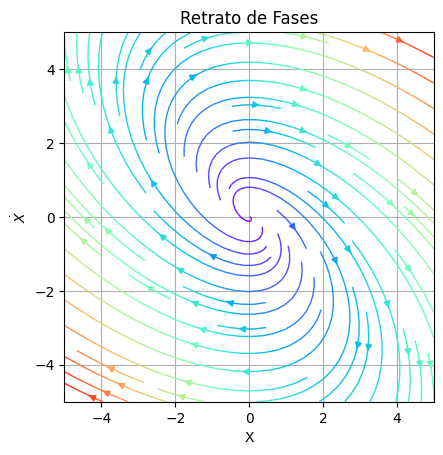

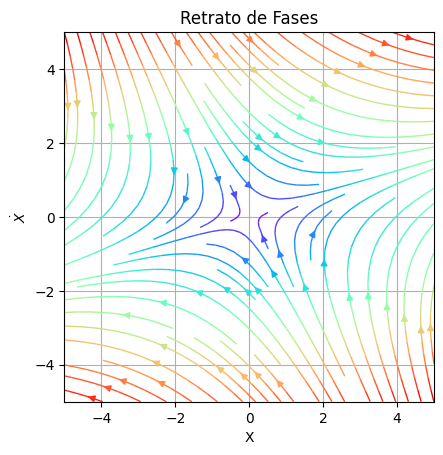

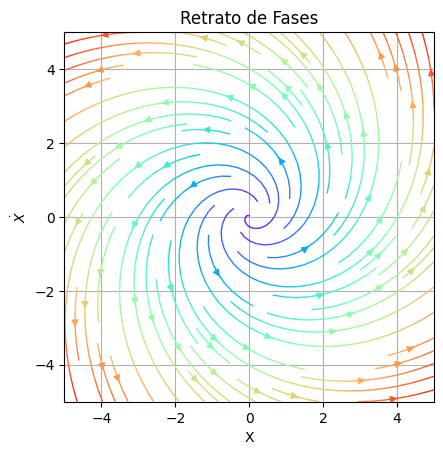

In [ ]:
transformation(1,1,-1,0)

##### **iv)**

$$
A =
\begin{pmatrix}
1 & 1 \\
-1 & 3 \\
\end{pmatrix}
$$

X' = 
 [[ 1  1]
 [-1  3]] X
 Eigenvalues:
[2. 2.]
 Eigenvectors:
[[ 1. -1.]
 [ 1. -1.]]
 General Solution: x(t) = 
+ C_0 * e^(2.0 * t) * [1. 1.]^T 
+ C_1 * e^(2.0 * t) * (t) * [-1. -1.]^T 
 Where t is the variable and T is the transposed matrix.

T = 
[[ 1. -1.]
 [ 1. -1.]]

B = 
[[ 2.  0.]
 [-0.  2.]] 

Y' = 
 [[ 2.  0.]
 [-0.  2.]] Y
 Eigenvalues:
[2. 2.]
 Eigenvectors:
[[ 1.       -0.679616]
 [-0.246787  0.773968]]
 General Solution: y(t) = 
+ C_0 * e^(2.0 * t) * [ 1.       -0.246787]^T 
+ C_1 * e^(2.0 * t) * (t) * [-0.679616  0.773968]^T 
 Where t is the variable and T is the transposed matrix.

 Phase portrait for A, T, and B respectively: 



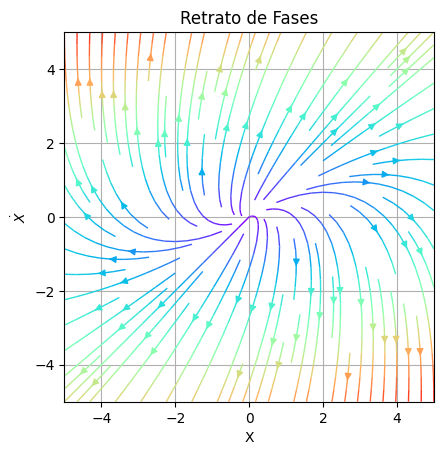

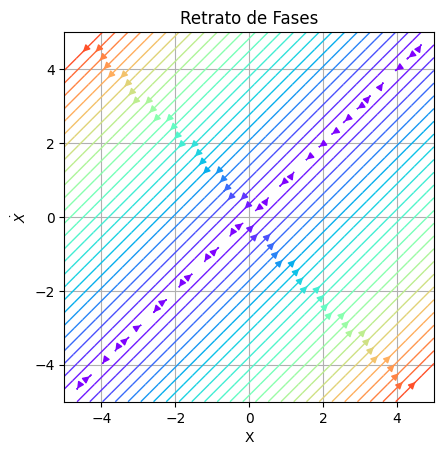

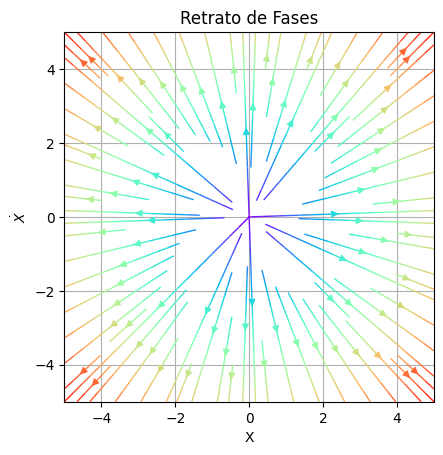

In [ ]:
transformation(1,1,-1,3)

##### **v)**

$$
A =
\begin{pmatrix}
1 & 1 \\
-1 & -3 \\
\end{pmatrix}
$$

X' = 
 [[ 1  1]
 [-1 -3]] X
 Eigenvalues:
[ 0.732051 -2.732051]
 Eigenvectors:
[[ 1.       -0.267949]
 [-0.267949  1.      ]]
 General Solution: x(t) = 
+ C_0 * e^(0.732051 * t) * [ 1.       -0.267949]^T 
+ C_1 * e^(-2.732051 * t) * [-0.267949  1.      ]^T 
 Where t is the variable and T is the transposed matrix.

T = 
[[ 1.       -0.267949]
 [-0.267949  1.      ]]

B = 
[[ 0.732051 -0.      ]
 [ 0.       -2.732051]] 

Y' = 
 [[ 0.732051 -0.      ]
 [ 0.       -2.732051]] Y
 Eigenvalues:
[ 0.732051 -2.732051]
 Eigenvectors:
[[1. 0.]
 [0. 1.]]
 General Solution: y(t) = 
+ C_0 * e^(0.732051 * t) * [1. 0.]^T 
+ C_1 * e^(-2.732051 * t) * [0. 1.]^T 
 Where t is the variable and T is the transposed matrix.

 Phase portrait for A, T, and B respectively: 



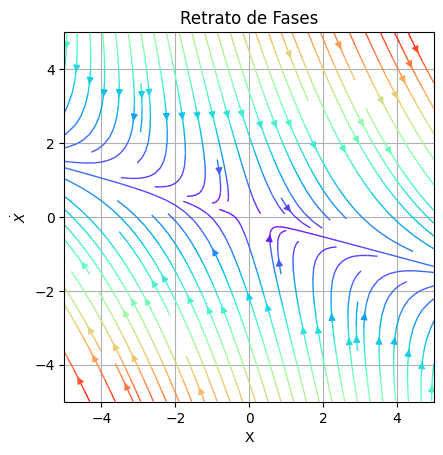

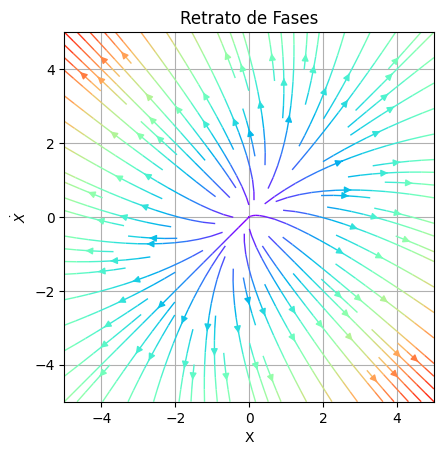

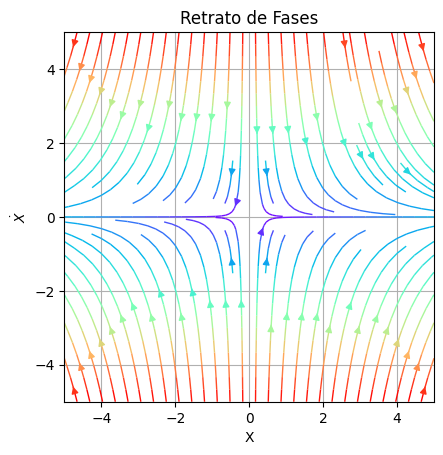

In [ ]:
transformation(1,1,-1,-3)

##### **vi)**

$$
A =
\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
$$

X' = 
 [[ 1  1]
 [ 1 -1]] X
 Eigenvalues:
[ 1.414214 -1.414214]
 Eigenvectors:
[[ 1.       -0.414214]
 [ 0.414214  1.      ]]
 General Solution: x(t) = 
+ C_0 * e^(1.414214 * t) * [1.       0.414214]^T 
+ C_1 * e^(-1.414214 * t) * [-0.414214  1.      ]^T 
 Where t is the variable and T is the transposed matrix.

T = 
[[ 1.       -0.414214]
 [ 0.414214  1.      ]]

B = 
[[ 1.414214 -0.      ]
 [-0.       -1.414214]] 

Y' = 
 [[ 1.414214 -0.      ]
 [-0.       -1.414214]] Y
 Eigenvalues:
[ 1.414214 -1.414214]
 Eigenvectors:
[[1. 0.]
 [0. 1.]]
 General Solution: y(t) = 
+ C_0 * e^(1.414214 * t) * [1. 0.]^T 
+ C_1 * e^(-1.414214 * t) * [0. 1.]^T 
 Where t is the variable and T is the transposed matrix.

 Phase portrait for A, T, and B respectively: 



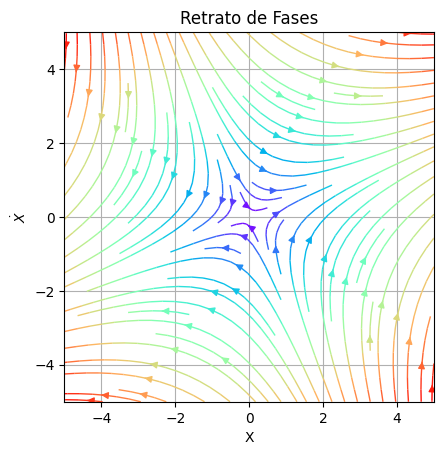

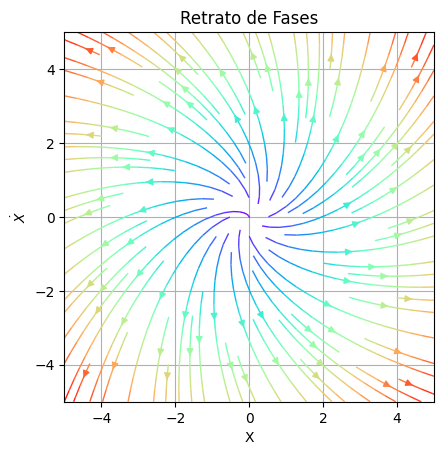

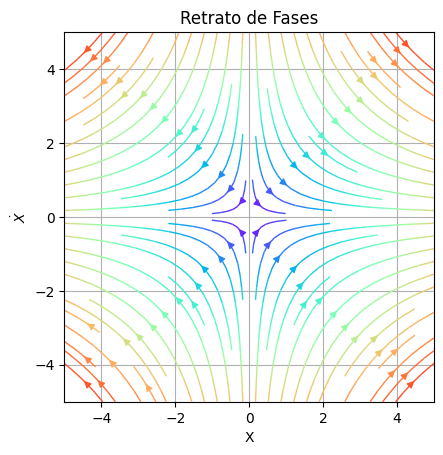

In [ ]:
transformation(1,1,1,-1)

#### **Exercise 3**

Find the general solution of the following harmonic oscillator equations:

##### **a)**

$$
x''+x'+x=0
$$

We can rewrite the second-order differential equation as:

$$
x'=y
$$

$$
y'=-x-y
$$

Solving the system $X'=AX$ where A is:

$$
A =
\begin{pmatrix}
0 & 1 \\
-1 & -1 \\
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[0, 1], [-1, -1]])
general_solution(matrix)

X' = 
 [[ 0  1]
 [-1 -1]] X
 Eigenvalues:
[-0.5+0.866025j -0.5-0.866025j]
 Eigenvectors:
[[ 1. +0.j        1. -0.j      ]
 [-0.5+0.866025j -0.5-0.866025j]]
 General Solution: x(t) = 
+ C_0 * e^(-0.5 * t) * [cos(0.866025 * t)	-sin(0.866025 * t)]^T 
+ C_1 * e^(-0.5 * t) * [sin(0.866025 * t)	cos(0.866025 * t)]^T 
 Where t is the variable and T is the transposed matrix.


##### **b)**

$$
x''+2x'+x=0
$$

We can rewrite the second-order differential equation as:

$$
x'=y
$$

$$
y'=-x-2y
$$

Solving the system $X'=AX$ where A is:

$$
A =
\begin{pmatrix}
0 & 1 \\
-1 & -2 \\
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[0, 1], [-1, -2]])
general_solution(matrix)

X' = 
 [[ 0  1]
 [-1 -2]] X
 Eigenvalues:
[-1. -1.]
 Eigenvectors:
[[ 1. -1.]
 [-1.  1.]]
 General Solution: x(t) = 
+ C_0 * e^(-1.0 * t) * [ 1. -1.]^T 
+ C_1 * e^(-1.0 * t) * (t) * [-1.  1.]^T 
 Where t is the variable and T is the transposed matrix.


#### **Exercise 5**

Sketch the phase portrait of $X′ = AX$ where

$$
A =
\begin{pmatrix}
a & 1 \\
2a & 2 \\
\end{pmatrix}
$$

For which values of a do you find a bifurcation? Describe the phase
portrait for a-values above and below the bifurcation point.

First, let's find the eigenvalues of A using $det(A- \lambda I)$

$$
\begin{vmatrix}
a - \lambda  & 1 \\
2a & 2 - \lambda \\
\end{vmatrix}
= (a-\lambda)(2- \lambda)-2a \\
\lambda^2 - (2+a) \lambda = 0
\lambda(\lambda - 2 - a ) = 0 \\
λ_1=0,λ_2=2+a
$$

The $λ_1=0$ indicates that one of the state variables (one dimension of the system) does not evolve over time; it remains constant. This is often referred to as a "center manifold" or "center subspace." In the phase portrait, one axis (associated with the zero eigenvalue) will have trajectories that are straight lines parallel to that axis. These trajectories represent states that do not change.

He have tree cases:

- If $a<-2$, then $λ_1=0,λ_2<0$

For a = -10
X' = 
 [[-10   1]
 [-20   2]] X
 Eigenvalues:
[-8.  0.]



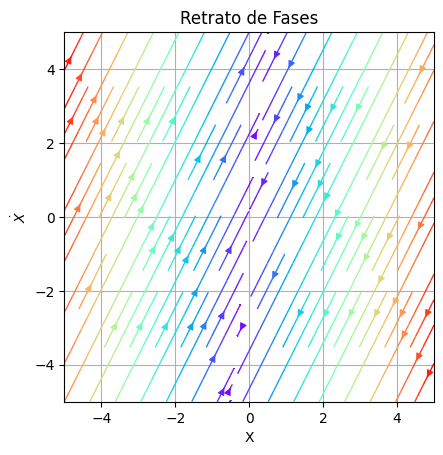

In [ ]:
a = -10
print(f"For a = {a}")
generar_retrato_de_fases(a, 1, 2*a, 2, True)

For a = -2.5
X' = 
 [[-2.5  1. ]
 [-5.   2. ]] X
 Eigenvalues:
[-0.5 -0. ]



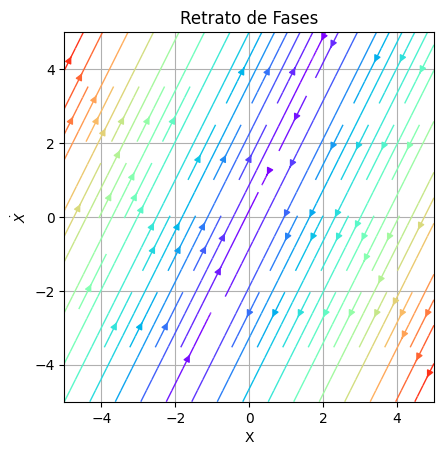

In [ ]:
a = -2.5
print(f"For a = {a}")
generar_retrato_de_fases(a, 1, 2*a, 2, True)

 The trajectories will move toward the origin, indicating a stable behavior in that dimension.

- If $a=-2$, then $λ_{1,2}=0$

For a = -2
X' = 
 [[-2  1]
 [-4  2]] X
 Eigenvalues:
[0. 0.]



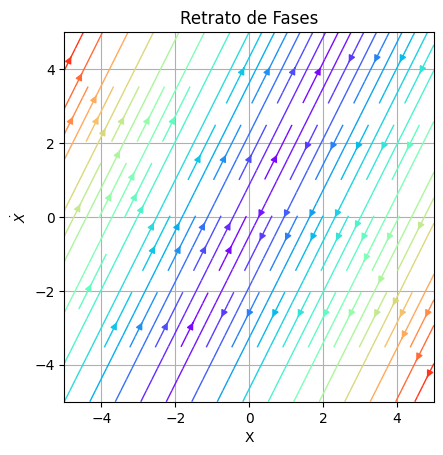

In [ ]:
a = -2
print(f"For a = {a}")
generar_retrato_de_fases(a, 1, 2*a, 2, True)

- If $a<-2$, then $λ_1=0,λ_2>0$

For a = -1.5
X' = 
 [[-1.5  1. ]
 [-3.   2. ]] X
 Eigenvalues:
[-0.   0.5]



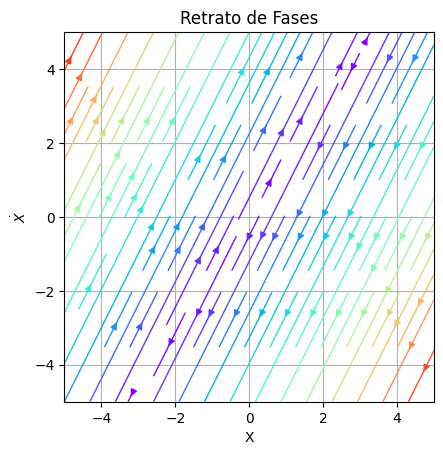

In [ ]:
a = -1.5
print(f"For a = {a}")
generar_retrato_de_fases(a, 1, 2*a, 2, True)

There is no movement or change in the state of the system. The equilibrium point at the origin is stable in all directions, but it is a special type of equilibrium where no motion occurs.

For a = 10
X' = 
 [[10  1]
 [20  2]] X
 Eigenvalues:
[12.  0.]



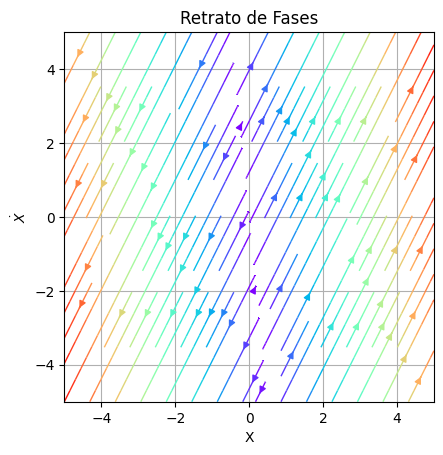

In [ ]:
a = 10
print(f"For a = {a}")
generar_retrato_de_fases(a, 1, 2*a, 2, True)

The trajectories along the corresponding axis will move away from the origin as time progresses, indicating an unstable behavior in that dimension.

### **Chapter 5**


#### **Exercise 2**

Find the eigenvalues and eigenvectors of the following matrices

##### **a)**

$$
\begin{pmatrix}
0 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 0 \\
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[0., 0., 1.], [0., 1., 0.], [1., 0., 0.]])
general_solution(matrix)

X' = 
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]] X
 Eigenvalues:
[ 1. -1.  1.]
 Eigenvectors:
[[ 1.       -1.        0.      ]
 [ 0.        0.        1.414214]
 [ 1.        1.        0.      ]]
 General Solution: x(t) = 
+ C_0 * e^(1.0 * t) * [1. 0. 1.]^T 
+ C_1 * e^(-1.0 * t) * [-1.  0.  1.]^T 
+ C_2 * e^(1.0 * t) * (t) * [0.       1.414214 0.      ]^T 
 Where t is the variable and T is the transposed matrix.


##### **b)**

$$
\begin{pmatrix}
0 & 0 & 1 \\
0 & 2 & 0 \\
3 & 0 & 0 \\
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[0., 0., 1.], [0., 2., 0.], [3., 0., 0.]])
general_solution(matrix)

X' = 
 [[0. 0. 1.]
 [0. 2. 0.]
 [3. 0. 0.]] X
 Eigenvalues:
[ 1.732051 -1.732051  2.      ]
 Eigenvectors:
[[ 1.       -1.        0.      ]
 [ 0.        0.        2.      ]
 [ 1.732051  1.732051  0.      ]]
 General Solution: x(t) = 
+ C_0 * e^(1.732051 * t) * [1.       0.       1.732051]^T 
+ C_1 * e^(-1.732051 * t) * [-1.        0.        1.732051]^T 
+ C_2 * e^(2.0 * t) * [0. 2. 0.]^T 
 Where t is the variable and T is the transposed matrix.


##### **c)**

$$
\begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[1., 1., 1.], [1., 1., 1.], [1., 1., 1.]])
general_solution(matrix)

X' = 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] X
 Eigenvalues:
[-0.  3.  0.]
 Eigenvectors:
[[ 1.       -0.707107 -0.      ]
 [-0.5      -0.707107  0.866025]
 [-0.5      -0.707107 -0.866025]]
 General Solution: x(t) = 
+ C_0 * e^(-0.0 * t) * [ 1.  -0.5 -0.5]^T 
+ C_1 * e^(3.0 * t) * [-0.707107 -0.707107 -0.707107]^T 
+ C_2 * e^(0.0 * t) * (t) * [-0.        0.866025 -0.866025]^T 
 Where t is the variable and T is the transposed matrix.


##### **d)**

$$
\begin{pmatrix}
0 & 0 & 2 \\
0 & 2 & 0 \\
-2 & 0 & 0 \\
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[0., 0., 2.], [0., 2., 0.], [-2., 0., 0.]])
general_solution(matrix)

X' = 
 [[ 0.  0.  2.]
 [ 0.  2.  0.]
 [-2.  0.  0.]] X
 Eigenvalues:
[0.+2.j 0.-2.j 2.+0.j]
 Eigenvectors:
[[ 1.-0.j       -1.+0.j       -0.+0.j      ]
 [-0.+0.j        0.-0.j       -0.+1.414214j]
 [-0.+1.j        0.+1.j       -0.+0.j      ]]
 General Solution: x(t) = 
+ C_2 * e^(2.0 * t) * [-0. -0. -0.]^T 
+ C_0 * e^(0.0 * t) * [cos(2.0 * t)	-sin(2.0 * t)]^T 
+ C_1 * e^(0.0 * t) * [sin(2.0 * t)	cos(2.0 * t)]^T 
 Where t is the variable and T is the transposed matrix.


##### **e)**

$$
\begin{pmatrix}
3 & 0 & 0 & 1 \\
0 & 1 & 2 & 2 \\
1 & -2 & -1 & -4 \\
-1 & 0 & 0 & 3
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[3., 0., 0., 1.], [0., 1., 2., 2.], [1., -2., -1., -4.], [-1., 0., 0., 3.]])
general_solution(matrix)

X' = 
 [[ 3.  0.  0.  1.]
 [ 0.  1.  2.  2.]
 [ 1. -2. -1. -4.]
 [-1.  0.  0.  3.]] X
 Eigenvalues:
[ 3.+1.j        3.-1.j       -0.+1.732051j -0.-1.732051j]
 Eigenvectors:
[[ 1.      -0.j       1.      +0.j      -0.      +0.j
  -0.      -0.j     ]
 [-0.      +0.j      -0.      -0.j       0.612372+1.06066j
   0.612372-1.06066j]
 [ 0.      -1.j       0.      +1.j      -1.224745-0.j
  -1.224745-0.j     ]
 [-0.      +1.j      -0.      -1.j       0.      -0.j
   0.      +0.j     ]]
 General Solution: x(t) = 
+ C_0 * e^(3.0 * t) * [cos(1.0 * t)	-sin(1.0 * t)]^T 
+ C_1 * e^(3.0 * t) * [sin(1.0 * t)	cos(1.0 * t)]^T 
+ C_2 * e^(-0.0 * t) * [cos(1.732051 * t)	-sin(1.732051 * t)]^T 
+ C_3 * e^(-0.0 * t) * [sin(1.732051 * t)	cos(1.732051 * t)]^T 
 Where t is the variable and T is the transposed matrix.


#### **Exercise 5**

Put the following matrices in canonical form:

##### **a)**

$$
\begin{pmatrix}
0 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 0 \\
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[0., 0., 1.], [0., 1., 0.], [1., 0., 0.]])
general_solution(matrix)

X' = 
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]] X
 Eigenvalues:
[ 1. -1.  1.]
 Eigenvectors:
[[ 1.       -1.        0.      ]
 [ 0.        0.        1.414214]
 [ 1.        1.        0.      ]]
 General Solution: x(t) = 
+ C_0 * e^(1.0 * t) * [1. 0. 1.]^T 
+ C_1 * e^(-1.0 * t) * [-1.  0.  1.]^T 
+ C_2 * e^(1.0 * t) * (t) * [0.       1.414214 0.      ]^T 
 Where t is the variable and T is the transposed matrix.


##### **b)**

$$
\begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[1., 0., 1.], [0., 1., 0.], [0., 0., 1.]])
general_solution(matrix)

X' = 
 [[1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]] X
 Eigenvalues:
[1. 1. 1.]
 Eigenvectors:
[[ 1.  0. -1.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
 General Solution: x(t) = 
+ C_0 * e^(1.0 * t) * [1. 0. 0.]^T 
+ C_1 * e^(1.0 * t) * (t) * [0. 1. 0.]^T 
+ C_2 * e^(1.0 * t) * (t^2/2!) * [-1.  0.  0.]^T 
 Where t is the variable and T is the transposed matrix.


##### **c)**

$$
\begin{pmatrix}
0 & 1 & 0 \\
-1 & 0 & 0 \\
1 & 1 & 1 \\
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[0., 1., 0.], [-1., 0., 0.], [1., 1., 1.]])
general_solution(matrix)

X' = 
 [[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 1.  1.  1.]] X
 Eigenvalues:
[1.+0.j 0.+1.j 0.-1.j]
 Eigenvectors:
[[ 0.     +0.j      -0.57735+0.j      -0.57735-0.j     ]
 [ 0.     +0.j       0.     -0.57735j  0.     +0.57735j]
 [ 1.     +0.j       0.     +0.57735j  0.     -0.57735j]]
 General Solution: x(t) = 
+ C_0 * e^(1.0 * t) * [0. 0. 1.]^T 
+ C_1 * e^(0.0 * t) * [cos(1.0 * t)	-sin(1.0 * t)]^T 
+ C_2 * e^(0.0 * t) * [sin(1.0 * t)	cos(1.0 * t)]^T 
 Where t is the variable and T is the transposed matrix.


##### **d)**

$$
\begin{pmatrix}
0 & 1 & 0 \\
1 & 0 & 0 \\
1 & 1 & 1 \\
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[0., 1., 0.], [1., 0., 0.], [1., 1., 1.]])
general_solution(matrix)

X' = 
 [[0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]] X
 Eigenvalues:
[ 1.  1. -1.]
 Eigenvectors:
[[ 0.        0.        0.707107]
 [ 0.        0.       -0.707107]
 [ 1.       -1.        0.      ]]
 General Solution: x(t) = 
+ C_0 * e^(1.0 * t) * [0. 0. 1.]^T 
+ C_2 * e^(-1.0 * t) * [ 0.707107 -0.707107  0.      ]^T 
+ C_1 * e^(1.0 * t) * (t) * [ 0.  0. -1.]^T 
 Where t is the variable and T is the transposed matrix.


##### **e)**

$$
\begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 1 \\
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[1., 0., 1.], [0., 1., 0.], [1., 0., 1.]])
general_solution(matrix)

X' = 
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 1.]] X
 Eigenvalues:
[2. 0. 1.]
 Eigenvectors:
[[ 1.       -1.        0.      ]
 [ 0.        0.        1.414214]
 [ 1.        1.        0.      ]]
 General Solution: x(t) = 
+ C_0 * e^(2.0 * t) * [1. 0. 1.]^T 
+ C_1 * e^(0.0 * t) * [-1.  0.  1.]^T 
+ C_2 * e^(1.0 * t) * [0.       1.414214 0.      ]^T 
 Where t is the variable and T is the transposed matrix.


##### **f)**

$$
\begin{pmatrix}
1 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 1 \\
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[1., 1., 0.], [1., 1., 1.], [0., 1., 1.]])
general_solution(matrix)

X' = 
 [[1. 1. 0.]
 [1. 1. 1.]
 [0. 1. 1.]] X
 Eigenvalues:
[-0.414214  1.        2.414214]
 Eigenvectors:
[[ 1.        1.414214  1.      ]
 [-1.414214  0.        1.414214]
 [ 1.       -1.414214  1.      ]]
 General Solution: x(t) = 
+ C_0 * e^(-0.414214 * t) * [ 1.       -1.414214  1.      ]^T 
+ C_1 * e^(1.0 * t) * [ 1.414214  0.       -1.414214]^T 
+ C_2 * e^(2.414214 * t) * [1.       1.414214 1.      ]^T 
 Where t is the variable and T is the transposed matrix.


##### **g)**

$$
\begin{pmatrix}
1 & 0 & -1 \\
-1 & 1 & -1 \\
0 & 0 & 1 \\
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[1., 0., -1.], [-1., 1., -1.], [0., 0., 1.]])
general_solution(matrix)

X' = 
 [[ 1.  0. -1.]
 [-1.  1. -1.]
 [ 0.  0.  1.]] X
 Eigenvalues:
[1. 1. 1.]
 Eigenvectors:
[[0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
 General Solution: x(t) = 
+ C_0 * e^(1.0 * t) * [0. 1. 0.]^T 
+ C_1 * e^(1.0 * t) * (t) * [0. 1. 0.]^T 
+ C_2 * e^(1.0 * t) * (t^2/2!) * [0. 1. 0.]^T 
 Where t is the variable and T is the transposed matrix.


##### **h)**

$$
\begin{pmatrix}
1 & 0 & 0 & 1 \\
0 & 1 & 1 & 0 \\
0 & 0 & 1 & 0 \\
1 & 0 & 0 & 0 \\
\end{pmatrix}
$$

In [ ]:
matrix = np.array([[1., 0., 0., 1.], [0., 1., 1., 0.], [0., 0., 1., 0.], [1., 0., 0., 0.]])
general_solution(matrix)

X' = 
 [[1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]] X
 Eigenvalues:
[ 1.618034 -0.618034  1.        1.      ]
 Eigenvectors:
[[ 1.       -0.618034  0.        0.      ]
 [ 0.        0.        1.175571 -1.175571]
 [ 0.        0.        0.        0.      ]
 [ 0.618034  1.        0.        0.      ]]
 General Solution: x(t) = 
+ C_0 * e^(1.618034 * t) * [1.       0.       0.       0.618034]^T 
+ C_1 * e^(-0.618034 * t) * [-0.618034  0.        0.        1.      ]^T 
+ C_2 * e^(1.0 * t) * [0.       1.175571 0.       0.      ]^T 
+ C_3 * e^(1.0 * t) * (t) * [ 0.       -1.175571  0.        0.      ]^T 
 Where t is the variable and T is the transposed matrix.
